In [1]:
import numpy as np

def create_confusion_matrix(true_labels, predicted_labels, labels):
    num_labels = len(labels)
    confusion_matrix = np.zeros((num_labels, num_labels), dtype='uint8')
    labels_not_found = []

    for true, predicted in zip(true_labels, predicted_labels):
        true_index = labels.index(true)
        try:
            predicted_index = labels.index(predicted)
        except:
            print("label not found :", predicted)
            labels_not_found.append(predicted)
            
        if true_index != predicted_index:
            confusion_matrix[true_index][predicted_index] += 1

    return confusion_matrix, labels_not_found

In [2]:
import pandas as pd 
from collections import Counter

def sort_by_frequency(lst):
    counter = Counter(lst).most_common()
    sorted_lst = [k for k,v in counter]
    return sorted_lst


TARGET_FILE = './dataset/abstract_pred.csv'
df = pd.read_csv(TARGET_FILE)

# Example true labels
true_labels = df['actuals'].to_list()

# Example predicted labels
predicted_labels_abstract = df['prediction'].to_list()
# Example labels
labels = sort_by_frequency(true_labels)

# Create confusion matrix
confusion_matrix_abstract, labels_not_found = create_confusion_matrix(true_labels, predicted_labels_abstract, labels)
labels.extend(labels_not_found)
confusion_matrix_abstract, labels_not_found = create_confusion_matrix(true_labels, predicted_labels_abstract, labels)


confusion_df = pd.DataFrame(data=confusion_matrix_abstract, columns=labels, index=labels)
confusion_df.to_excel('./evaluation/confusion_matrix_abstract.xlsx')

label not found : B27F
label not found : F23J
label not found : F24J
label not found : F24J
label not found : F24B
label not found : F23J
label not found : F24B
label not found : F23J
label not found : F24J
label not found : D21B
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24B
label not found : F24J
label not found : C07G
label not found : F24J
label not found : H03D
label not found : F24J
label not found : F24J


In [3]:
TARGET_FILE = './dataset/claims_pred.csv'
df = pd.read_csv(TARGET_FILE)

# Example true labels
true_labels = df['actuals'].to_list()

# Example predicted labels
predicted_labels_claims = df['prediction'].to_list()
# Example labels
labels = sort_by_frequency(true_labels)

# # Create confusion matrix
confusion_matrix_claims = create_confusion_matrix(true_labels, predicted_labels_claims, labels)

# Create confusion matrix
confusion_matrix_claims, labels_not_found = create_confusion_matrix(true_labels, predicted_labels_claims, labels)
labels.extend(labels_not_found)
confusion_matrix_claims, labels_not_found = create_confusion_matrix(true_labels, predicted_labels_claims, labels)


confusion_df = pd.DataFrame(data=confusion_matrix_claims, columns=labels, index=labels)
confusion_df.to_excel('./evaluation/confusion_matrix_claims.xlsx')

label not found : F23J
label not found : F24J
label not found : F24J
label not found : B27F
label not found : F23J
label not found : F24J
label not found : F23J
label not found : F24J
label not found : D21B
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24B
label not found : F24J
label not found : C07G
label not found : F24J
label not found : H03D
label not found : F24J
label not found : F23J
label not found : F24J
label not found : F24J
label not found : B27F
label not found : F23J
label not found : F24J
label not found : F23J
label not found : F24J
label not found : D21B
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24J
label not found : F24B
label not found : F24J
label not found : C07G
label not found : F24J
label not found : H03D
label not found : F24J


# confusion matrix

/home/yzuo/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yzuo/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yzuo/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yzuo/miniconda3/lib/python3.9/site-p

              precision    recall  f1-score   support

        A01B       0.75      0.75      0.75        20
        A01C       0.67      0.88      0.76        32
        A01D       0.83      0.62      0.71        16
        A01F       0.86      0.75      0.80         8
        A01G       0.78      0.81      0.80        58
        A01H       0.94      0.56      0.70        27
        A01J       0.60      0.60      0.60         5
        A01K       0.67      0.70      0.68        79
        A01L       0.00      0.00      0.00         1
        A01M       0.67      0.95      0.78        21
        A01N       0.77      0.77      0.77       163
        A21B       1.00      0.50      0.67         4
        A21C       0.50      0.33      0.40         3
        A21D       1.00      0.43      0.60         7
        A22B       1.00      0.67      0.80         3
        A22C       0.62      1.00      0.77         5
        A23B       0.57      0.33      0.42        12
        A23C       0.57    

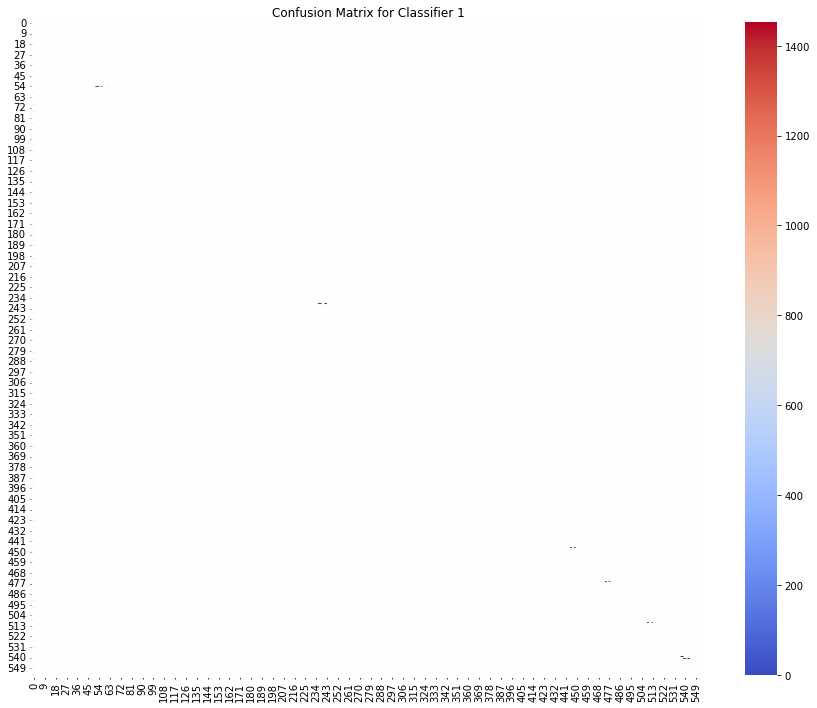

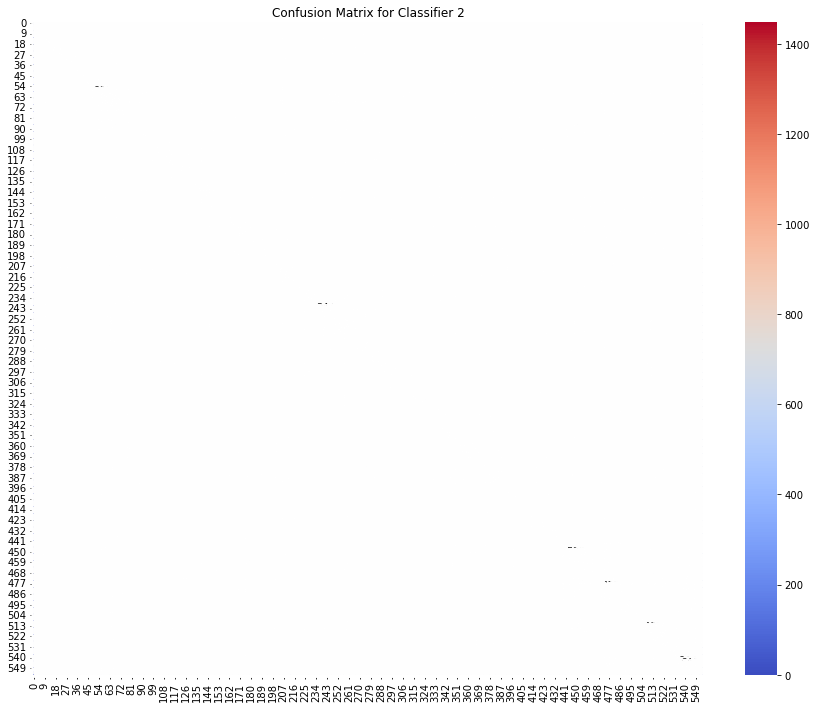

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assume y_true and y_pred are your data
y_true = true_labels # replace with your ground truth labels
y_pred1 = predicted_labels_abstract  # replace with your predictions from classifier 1
y_pred2 = predicted_labels_claims  # replace with your predictions from classifier 2

# # Creating confusion matrices
cm1 = confusion_matrix(y_true, y_pred1)
cm2 = confusion_matrix(y_true, y_pred2)

# Creating classification reports
cr1 = classification_report(y_true, y_pred1)
cr2 = classification_report(y_true, y_pred2)

# You can print these reports to get detailed information
print(cr1)
print(cr2)

# If you still want to visualize the large confusion matrix
plt.figure(figsize=(15, 12))
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix for Classifier 1')
plt.show()

plt.figure(figsize=(15, 12))
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix for Classifier 2')
plt.show()


In [5]:
# Calculate error difference matrix
error_difference = cm1 - cm2

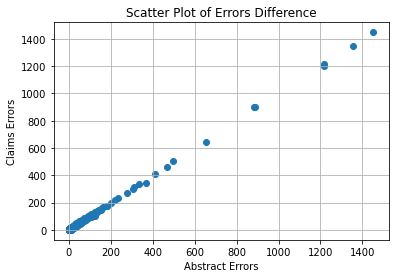

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Visualizing the error difference matrix using a heatmap
# plt.figure(figsize=(15, 12))
# sns.heatmap(error_difference, annot=True, fmt='d', cmap='coolwarm')
# plt.title('Error Difference Heatmap')
# plt.show()

# Scatter plot of the errors made by the classifiers for different classes
plt.scatter(cm1.flatten(), cm2.flatten())
plt.xlabel('Abstract Errors')
plt.ylabel('Claims Errors')
plt.title('Scatter Plot of Errors Difference')
plt.grid(True)
# plt.show()
plt.savefig('./evaluation/error_difference.png')

In [ ]:
from scipy.stats import pearsonr, spearmanr

# Calculate the correlation between the errors made by the classifiers
pearson_corr, _ = pearsonr(cm1.flatten(), cm2.flatten())
spearman_corr, _ = spearmanr(cm1.flatten(), cm2.flatten())

print(f'Pearson correlation: {pearson_corr:.2f}')
print(f'Spearman correlation: {spearman_corr:.2f}')

Pearson correlation: 1.00
Spearman correlation: 0.75
